In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Retrieval : loading the dataset creditcard.csv into a dataframe 
data = pd.read_csv("creditcard.csv",) 

In [3]:
# showing (number of transactions, number of variables)
print('creditcard dataset:', data.shape)

# showing the 5 first rows of the dataframe
data.head()

creditcard dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    99.827251
1     0.172749
Name: Class, dtype: float64


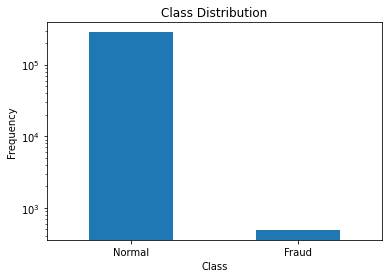

In [4]:
# Verifying the partition of classes 0 and 1 
LABELS = ["Normal", "Fraud"]

# Number of transactions in each class
number_of_classes = pd.value_counts(data['Class'], sort = True)

# Percentage of each class
percent_class = 100*number_of_classes/data.shape[0]
print(percent_class)

# Showing the distribution of each class using a log-scale 
number_of_classes.plot(kind = 'bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(len(number_of_classes)), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");
plt.yscale('log')

##### Q1- What's the conclusion ?
##### Q2- What should we do in data preparation ?

In [5]:
# Checking if there are missing values using .isna().any().any()
print(" Missing values ?",data.isna().any().any())

# Showing information about the dataset
data.info() 

 Missing values ? False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

<AxesSubplot:>

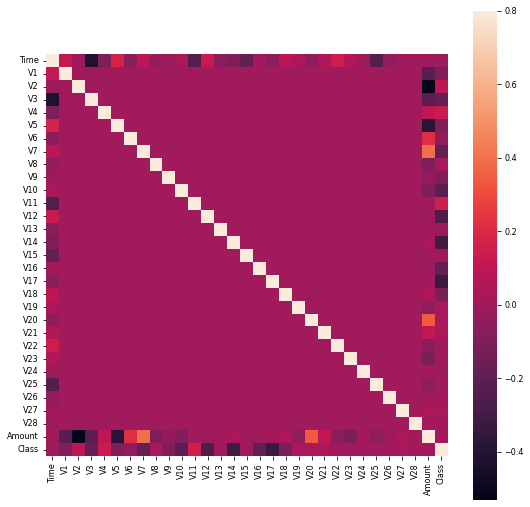

In [6]:
# Exploring the correlation between variables 
plt.figure(num=None, figsize=(9, 9)), plt.rc('font', size=8)    
sns.heatmap(data.corr(),vmax=0.8, square=True)

#### Q3- What's the conclusion ?

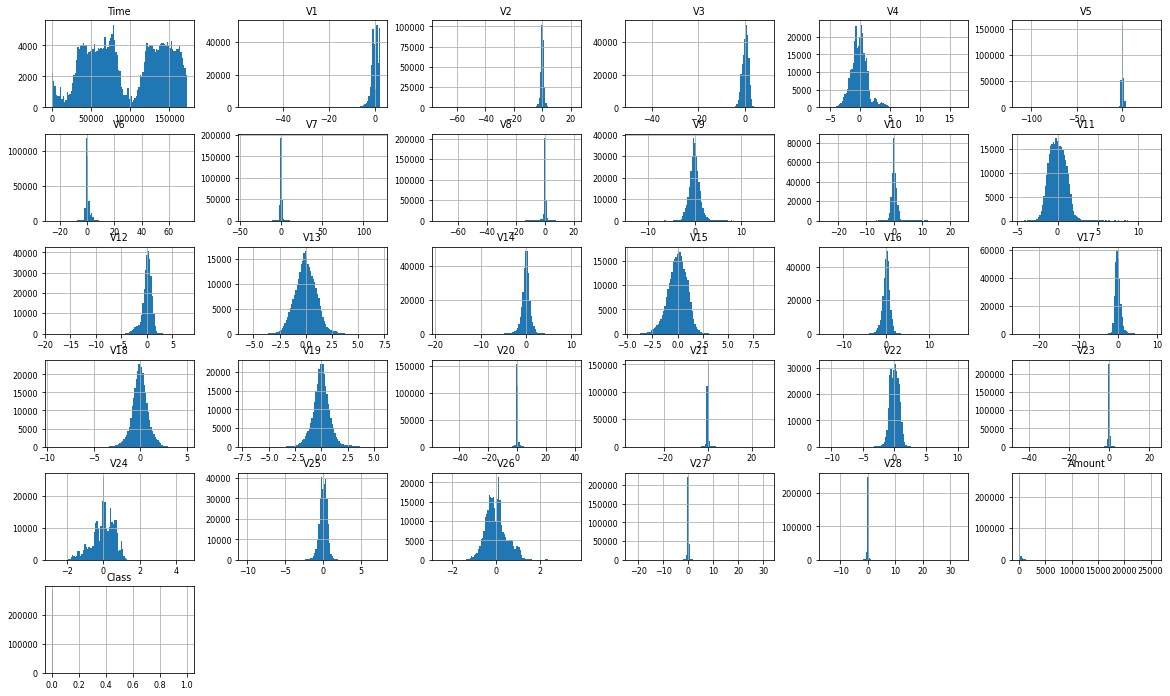

In [7]:
# Showing the distributions of variables
data.hist(bins=100, figsize=(20,12))
plt.show()

##### Q4- What's the conclusion ?
##### Q5- What should we do in data preparation ?

In [8]:
# compute descriptive statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Extracting 'Class' from data
y = data['Class']

# data consists only of features
data.drop(['Class','Time'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
from sklearn.model_selection import train_test_split

# adding cst=1e-10 to data['Amount'] to apply PowerTransformer with 'cox-box' to get symmetric distribution
data['Amount'] = data['Amount'] + 1e-10    

# Splitting the dataset into 80% training dataset and 20% testing dataset using """"stratify""""
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 32, stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [11]:
# PowerTransformer of feature 'Amount' 
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Computing Skewness of 'Amount' before transformation
print('Skewness of Amount:',data['Amount'].skew())

# training the transformer of data['Amount'] on X_train['Amount']
pt = PowerTransformer(method='box-cox', standardize=True, copy=False).fit(X_train['Amount'].values.reshape(-1,1))

# Applying transformation
pt.transform(X_train['Amount'].values.reshape(-1,1)) # for training 
pt.transform(X_test['Amount'].values.reshape(-1,1)) # for testing 

# Computing Skewness of 'Amount' after transformation
print('Skewness of Amount after scaling:',X_train['Amount'].skew())

Skewness of Amount: 16.977724453761017
Skewness of Amount after scaling: 0.11698333873639256


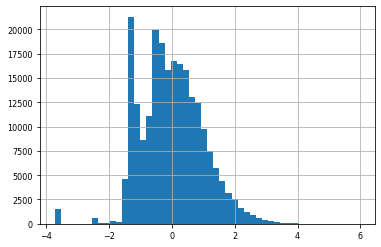

In [12]:
# Showing the distribution of 'Amount' after transformation
X_train['Amount'].hist(bins=50, figsize=(6,4))
plt.show()

In [13]:
# Augmenting the minority class with SMOTETomek to balance the two classes (only for the training dataset)
!pip install -U imbalanced-learn
from collections import Counter
from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42, n_jobs=-1)
X_resampled,y_resampled = smt.fit_resample(X_train.values,y_train.values.ravel())
print('training dataset %s' % Counter(y_resampled))

training dataset Counter({0: 227451, 1: 227451})


## Modeling and Evaluation

+ `LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
+ `GaussianNB`: https://scikit-learn.org/stable/modules/naive_bayes.html
+ `KNeighborsClassifier`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
+ `SVC`:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [14]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# showing default hyperparameters with get_params()
KNeighborsClassifier().get_params() 


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [15]:
# Create a list of the classification models
models = [LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=7)]
print(models)

# names of models
names = ['LogisticRegression', 'GaussianNB', 'KNeighborsClassifier']

[LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=7)]


In [16]:
from sklearn.metrics import f1_score, auc, precision_recall_curve, confusion_matrix
def modeling_evaluate(model, Xtrain, ytrain, Xtest, ytest):   
    # supervised training with fit()
    model.fit(Xtrain, ytrain)
    # predict for testing dataset
    ypred = model.predict(Xtest) 
    # computing evaualtion metrics: confusion matrix and f1-score
    confusion = confusion_matrix(ytest, ypred)    
    f1 = f1_score(ytest, ypred)    
    # compute precision, recall et PR_AUC (Area Under the PR curve )
    precision, recall, thresholds = precision_recall_curve(ytest, model.predict_proba(Xtest)[:,1]) 
    pr_auc = auc(recall, precision)
    return model, confusion, f1, recall, precision, pr_auc

LogisticRegression f1= 0.12149532710280375 pr_auc= 0.7730057526156772 
confusion=
 [[55555  1309]
 [    7    91]]
GaussianNB f1= 0.10225197808886183 pr_auc= 0.44658461442573566 
confusion=
 [[55403  1461]
 [   14    84]]
KNeighborsClassifier f1= 0.5979381443298969 pr_auc= 0.7763929402481086 
confusion=
 [[56758   106]
 [   11    87]]


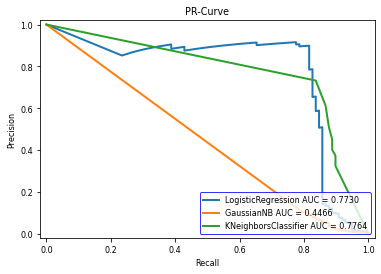

In [17]:
fig, ax = plt.subplots() 
for i in range(len(models)):
    models[i], confusion, f1, recall, precision, pr_auc = modeling_evaluate(models[i], X_resampled, y_resampled, X_test.values, y_test) 
    print(names[i], 'f1=', f1, 'pr_auc=', pr_auc, '\nconfusion=\n', confusion)
    plt.plot(recall, precision, label = (names[i] + ' AUC = %0.4f' % pr_auc), linewidth=2.0)
    
leg = plt.legend(loc = 'lower right'); leg.get_frame().set_edgecolor('b')
plt.title('PR-Curve')
plt.xlim([-.02, 1.02]); plt.ylim([-.02, 1.02])
plt.ylabel('Precision'); plt.xlabel('Recall')
plt.show() 

In [18]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

knn =  KNeighborsClassifier()

# showing default hyperparameters with get_params()
print('knn hyperparameters', knn.get_params()) 

# Fine-tuning of KNN : select the best K  
parameters = {'n_neighbors':[3,5,7,9,11]}
      
# cross-validation with nfolds= 5
cv = KFold(n_splits=5, shuffle=True, random_state=32)
      
# grid search & cross-validation 
grid_obj = GridSearchCV(estimator=knn, param_grid=parameters, cv=cv, scoring='f1', n_jobs=-1)

# training using grid search & cross-validation 
grid_obj.fit(X_resampled, y_resampled)  # training on k-1 folds and validation on 1 fold

# best knn with best K 
best_knn = grid_obj.best_estimator_ # best model has the highest f1 score
print('Best Knn with k= ', best_knn.n_neighbors, 'and the highest f1_score ', grid_obj.best_score_)

knn hyperparameters {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best Knn with k=  3 and the highest f1_score  0.9993279427839061


Best KNN : f1= 0.7172995780590716 pr_auc= 0.7822153876556334 
confusion=
 [[56810    54]
 [   13    85]]


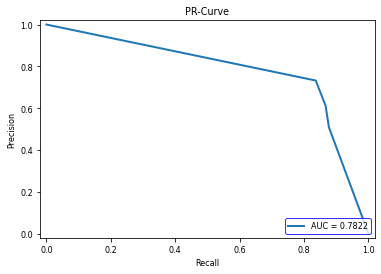

In [19]:
# train and evaluate the best knn 
best_knn, confusion, f1, recall, precision, pr_auc = modeling_evaluate(best_knn, X_resampled, y_resampled, X_test.values, y_test) 
print('Best KNN : f1=', f1, 'pr_auc=', pr_auc, '\nconfusion=\n', confusion)

# Plot the PR-curve
plt.plot(recall, precision, label = ('AUC = %0.4f' % pr_auc), linewidth=2.0)
leg = plt.legend(loc = 'lower right'); leg.get_frame().set_edgecolor('b')
plt.title('PR-Curve')
plt.xlim([-.02, 1.02]); plt.ylim([-.02, 1.02])
plt.ylabel('Precision'); plt.xlabel('Recall')
plt.show() 

In [20]:
# deploy the best model
import joblib  
joblib.dump(best_knn, "knn_3.pkl")

['knn_3.pkl']